In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [50]:
col1 = np.random.randint(20,101,500)
col2 = np.random.randint(20000,1000001,500)
col3 = np.random.randint(0,2,500)

### Just create a dataframe where feature1 and feature2 are not scaled to show how normalization and scaling is important

In [51]:
df = pd.DataFrame(data={'Feature#1': col1, 'Feature#2':col2, 'Target': col3 })
df

,Feature#1,Feature#2,Target
0,80,385479,0
1,58,546375,0
2,28,318695,0
3,82,875297,1
4,91,70599,0
...,...,...,...
495,62,699595,1
496,83,247831,1
497,29,900246,1
498,30,163934,0


In [52]:
X = df[["Feature#1", "Feature#2"]]
y = df["Target"]

In [53]:
trainx, testx, trainy, testy = train_test_split(X,y, test_size=0.2, random_state=41)

In [54]:
model = Sequential()
model.add(Dense(4,activation='relu', input_dim = 2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 12        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

####   Here we can see that the accuracy is in betweenthe 0.45 and 0.54 but when we train this model on scaled or normalized data then we will get the better results

In [57]:
history = model.fit(trainx, trainy, epochs=100, validation_data=(trainx,trainy))

Epoch 1/100
13/13 [==============================] - 1s 18ms/step - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6931 - val_accuracy: 0.5150
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5150 - val_loss: 0.6931 - val_accuracy: 0.5150
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5150 - val_loss: 0.6930 - val_accuracy: 0.5150
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5150 - val_loss: 0.6930 - val_accuracy: 0.5150
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5150 - val_loss: 0.6930 - val_accuracy: 0.5150
Epoch 6/100
13/13 [==============================] - 0s 13ms/step - loss: 0.6930 - accuracy: 0.5150 - val_loss: 0.6929 - val_accuracy: 0.5150
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.5150 - val_loss: 0.6929 - val_accuracy: 0.5150
Epoch 8/100

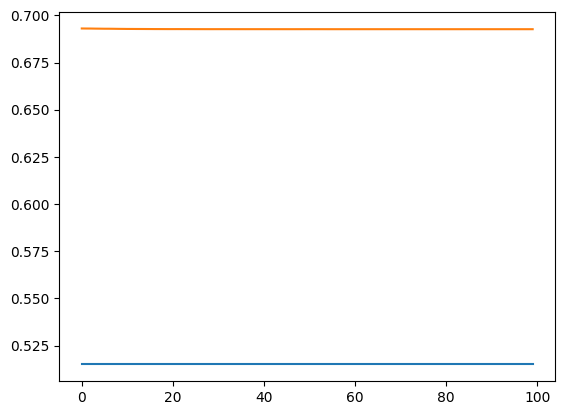

In [58]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])

In [59]:
df

,Feature#1,Feature#2,Target
0,80,385479,0
1,58,546375,0
2,28,318695,0
3,82,875297,1
4,91,70599,0
...,...,...,...
495,62,699595,1
496,83,247831,1
497,29,900246,1
498,30,163934,0


In [60]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
trainx = scale.fit_transform(trainx)
testx = scale.fit_transform(testx)

In [61]:
model = Sequential()
model.add(Dense(4,activation='relu', input_dim = 2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [63]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
history = model.fit(trainx, trainy, epochs=100, validation_data=(trainx,trainy))

Epoch 1/100
13/13 [==============================] - 1s 29ms/step - loss: 0.7273 - accuracy: 0.4700 - val_loss: 0.7231 - val_accuracy: 0.4750
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.7194 - accuracy: 0.4800 - val_loss: 0.7154 - val_accuracy: 0.4775
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.7122 - accuracy: 0.4775 - val_loss: 0.7093 - val_accuracy: 0.4750
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.7070 - accuracy: 0.4800 - val_loss: 0.7045 - val_accuracy: 0.4850
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.7029 - accuracy: 0.4825 - val_loss: 0.7012 - val_accuracy: 0.4800
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.7008 - accuracy: 0.4825 - val_loss: 0.6988 - val_accuracy: 0.4875
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6983 - accuracy: 0.4900 - val_loss: 0.6973 - val_accuracy: 0.4925
Epoch 8/100


#### So after scaling we can see in plots the accuracy is going up while loss is going down 

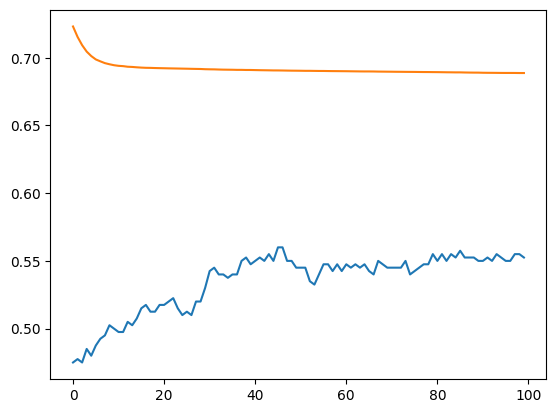

In [66]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])